In [104]:
# Phase 1: Data Collection and Exploratory Data Analysis (EDA)
# Step 1: Data Collection and Preprocessing
#import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd # If you are working with dataframes
import numpy as np # If you are working with arrays

# Load the dataset
df = pd.read_csv('Employee_data.csv')
df


,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,1,John Doe,29,Sales,55000,3,80,No
1,2,Jane Smith,35,HR,60000,7,85,No
2,3,Michael Brown,40,Engineering,80000,10,95,Yes
3,4,Emily Davis,28,Marketing,65000,5,78,No
4,5,David Johnson,50,Sales,75000,20,88,Yes
...,...,...,...,...,...,...,...,...
95,96,Daniel Allen,29,HR,53000,3,79,No
96,97,Thomas Harris,40,Engineering,91000,13,92,Yes
97,98,Michael Lewis,45,Sales,75000,16,89,No
98,99,Linda Young,50,HR,70000,21,87,Yes


In [119]:
# Optional: drop non-numeric columns (e.g., Name, ID)
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Or, drop specific columns you don’t want
# numeric_df = df.drop(columns=['Employee ID', 'Name'])


In [120]:
# Correlation matrix
corr = numeric_df.corr()


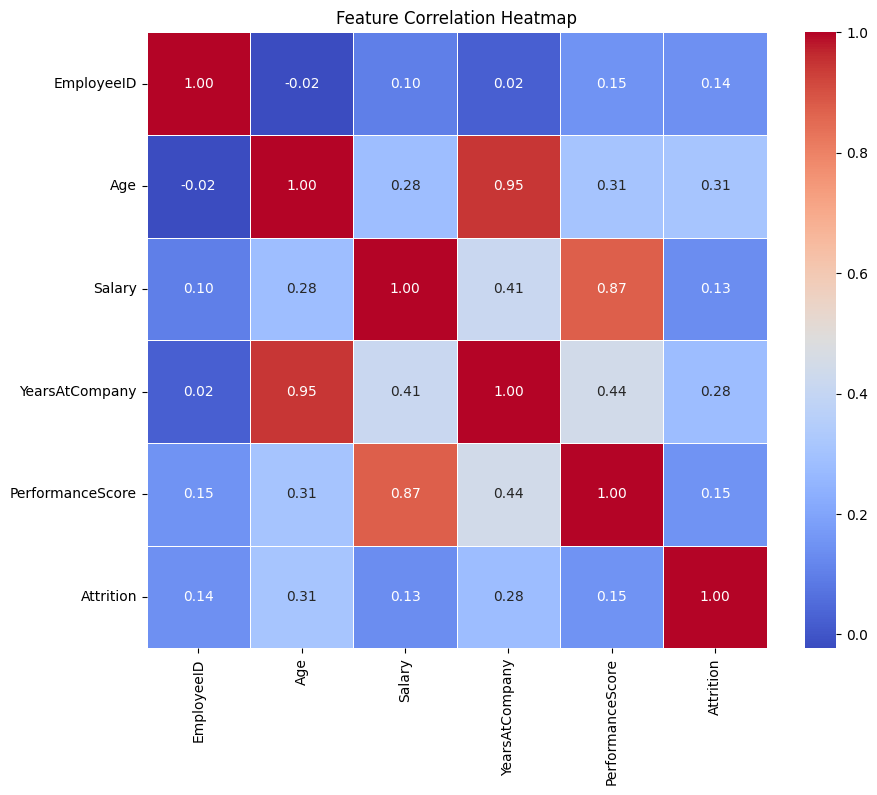

In [122]:

# Set plot size
plt.figure(figsize=(10, 8))

# Create heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

# Title and display
plt.title("Feature Correlation Heatmap")
plt.show()


In [105]:
df.dropna()

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,1,John Doe,29,Sales,55000,3,80,No
1,2,Jane Smith,35,HR,60000,7,85,No
2,3,Michael Brown,40,Engineering,80000,10,95,Yes
3,4,Emily Davis,28,Marketing,65000,5,78,No
4,5,David Johnson,50,Sales,75000,20,88,Yes
...,...,...,...,...,...,...,...,...
95,96,Daniel Allen,29,HR,53000,3,79,No
96,97,Thomas Harris,40,Engineering,91000,13,92,Yes
97,98,Michael Lewis,45,Sales,75000,16,89,No
98,99,Linda Young,50,HR,70000,21,87,Yes


In [106]:
df.drop_duplicates()

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,1,John Doe,29,Sales,55000,3,80,No
1,2,Jane Smith,35,HR,60000,7,85,No
2,3,Michael Brown,40,Engineering,80000,10,95,Yes
3,4,Emily Davis,28,Marketing,65000,5,78,No
4,5,David Johnson,50,Sales,75000,20,88,Yes
...,...,...,...,...,...,...,...,...
95,96,Daniel Allen,29,HR,53000,3,79,No
96,97,Thomas Harris,40,Engineering,91000,13,92,Yes
97,98,Michael Lewis,45,Sales,75000,16,89,No
98,99,Linda Young,50,HR,70000,21,87,Yes


In [107]:
print(df.describe())


       EmployeeID         Age        Salary  YearsAtCompany  PerformanceScore
count  100.000000  100.000000    100.000000      100.000000        100.000000
mean    50.500000   36.570000  72820.000000       10.800000         84.940000
std     29.011492    8.318478  12643.823102        6.361183          6.349771
min      1.000000   25.000000  43000.000000        1.000000         70.000000
25%     25.750000   29.750000  65000.000000        5.000000         80.000000
50%     50.500000   35.000000  72000.000000       10.000000         85.500000
75%     75.250000   41.250000  82750.000000       16.000000         90.000000
max    100.000000   60.000000  95000.000000       25.000000         95.000000


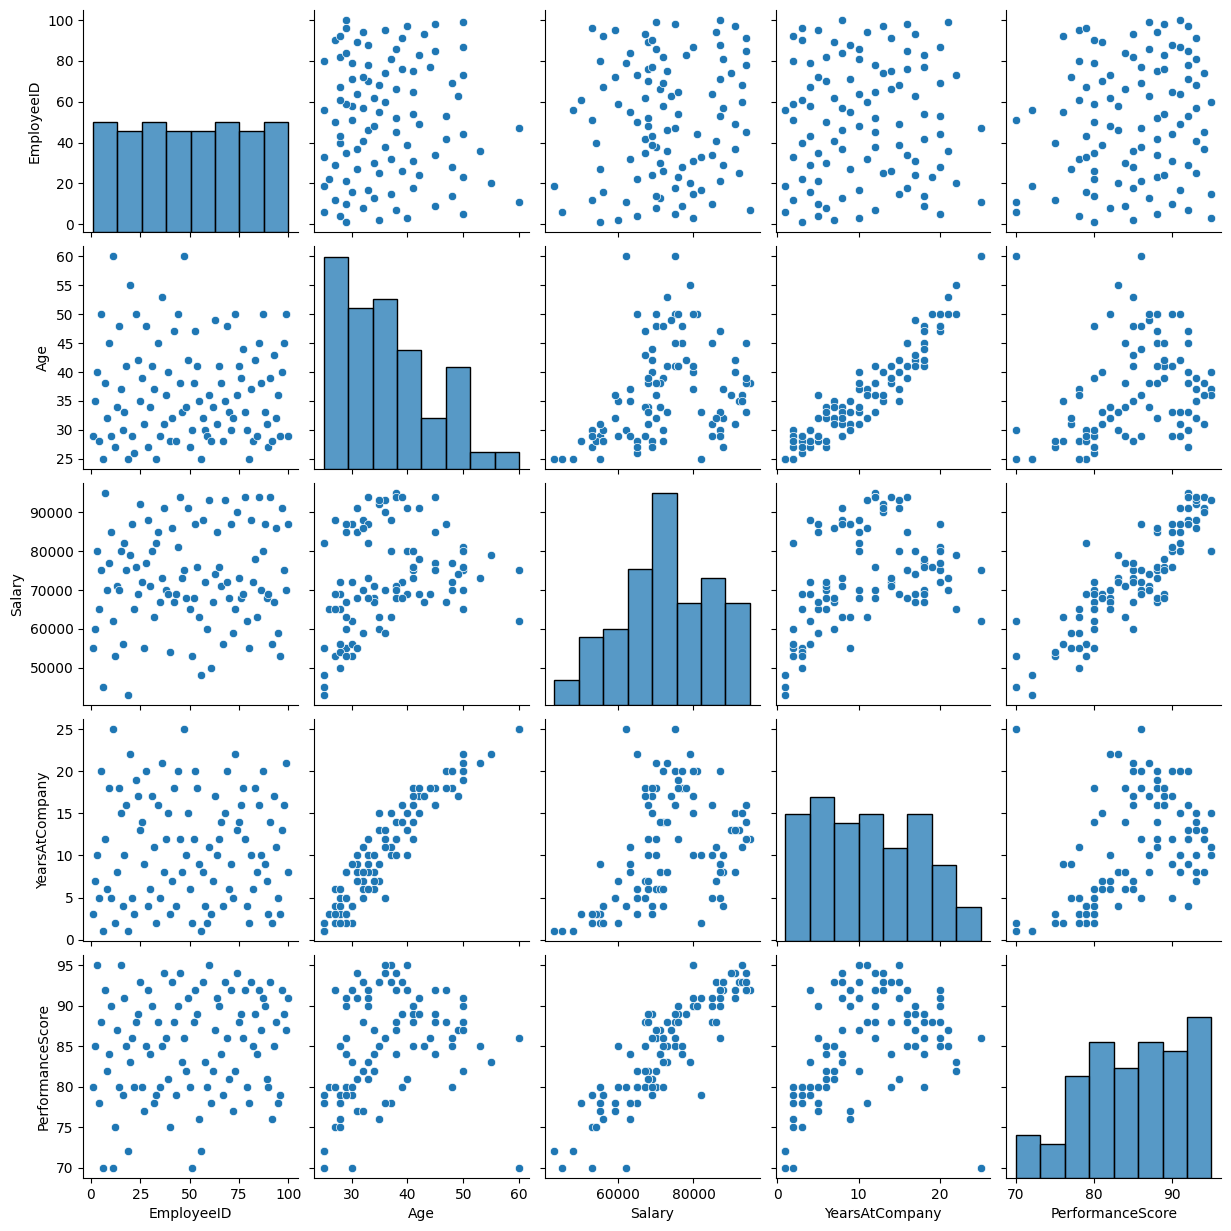

In [108]:

sns.pairplot(df)
plt.show()


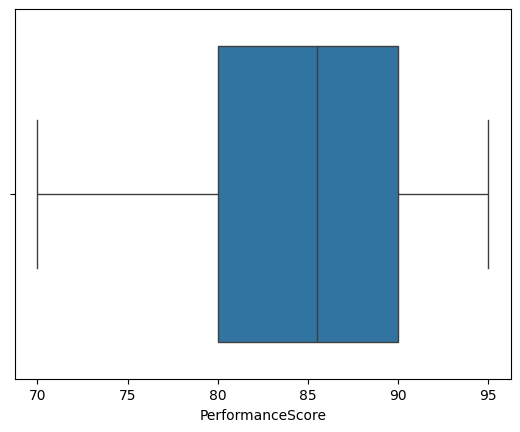

In [109]:
sns.boxplot(x=df['PerformanceScore'])
plt.show()


In [110]:
prob_attrition = df['Attrition'].value_counts(normalize=True)
print(prob_attrition)


Attrition
No     0.61
Yes    0.39
Name: proportion, dtype: float64


In [111]:
from scipy.stats import ttest_ind
# Example: Compare performance between two departments
dept1 = df[df['Department'] == 'Sales']['PerformanceScore']
dept2 = df[df['Department'] == 'Marketing']['PerformanceScore']
t_stat, p_value = ttest_ind(dept1, dept2)


In [112]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Salary', 'PerformanceScore']] = scaler.fit_transform(df[['Salary', 'PerformanceScore']])


In [113]:
from sklearn.preprocessing import LabelEncoder
df['Attrition'] = LabelEncoder().fit_transform(df['Attrition'])


In [114]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Attrition'])
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [115]:
from scipy import stats
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
df = df[(z_scores < 3).all(axis=1)]  # Keeping rows within 3 standard deviations

# Step 11: Final check of the cleaned dataset
print("\nCleaned Dataset Info:")
print(df.info())
print("\nFirst few rows of cleaned data:")
print(df.head())


Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EmployeeID        100 non-null    int64  
 1   Name              100 non-null    object 
 2   Age               100 non-null    int64  
 3   Department        100 non-null    object 
 4   Salary            100 non-null    float64
 5   YearsAtCompany    100 non-null    int64  
 6   PerformanceScore  100 non-null    float64
 7   Attrition         100 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 6.4+ KB
None

First few rows of cleaned data:
   EmployeeID           Name  Age   Department    Salary  YearsAtCompany  \
0           1       John Doe   29        Sales  0.230769               3   
1           2     Jane Smith   35           HR  0.326923               7   
2           3  Michael Brown   40  Engineering  0.711538              10   


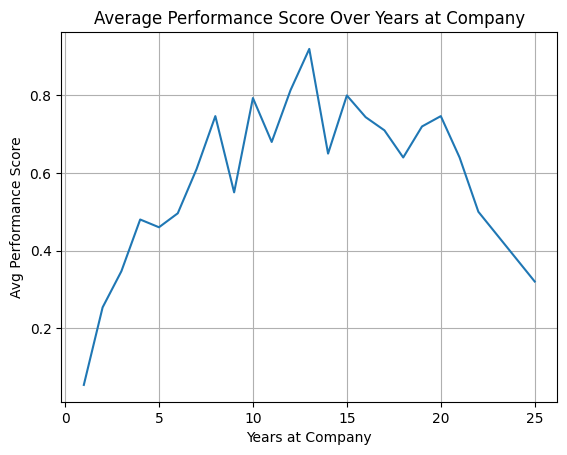

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Average Performance Score by Years at Company
avg_perf = df.groupby('YearsAtCompany')['PerformanceScore'].mean().reset_index()

sns.lineplot(data=avg_perf, x='YearsAtCompany', y='PerformanceScore')
plt.title('Average Performance Score Over Years at Company')
plt.xlabel('Years at Company')
plt.ylabel('Avg Performance Score')
plt.grid(True)
plt.show()


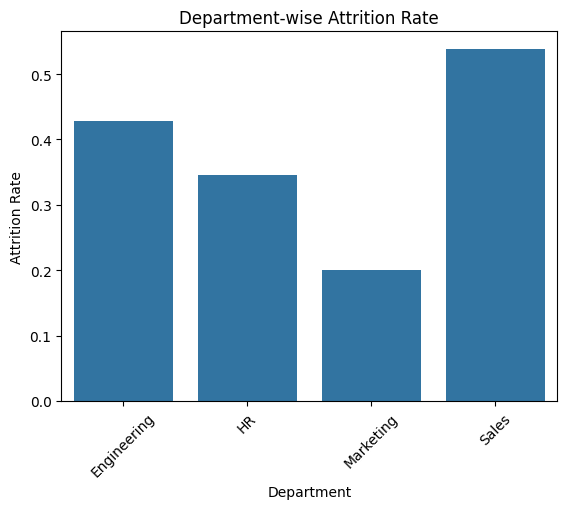

In [117]:
attr_rate = df.groupby('Department')['Attrition'].mean().reset_index()

sns.barplot(data=attr_rate, x='Department', y='Attrition')
plt.title('Department-wise Attrition Rate')
plt.ylabel('Attrition Rate')
plt.xticks(rotation=45)
plt.show()


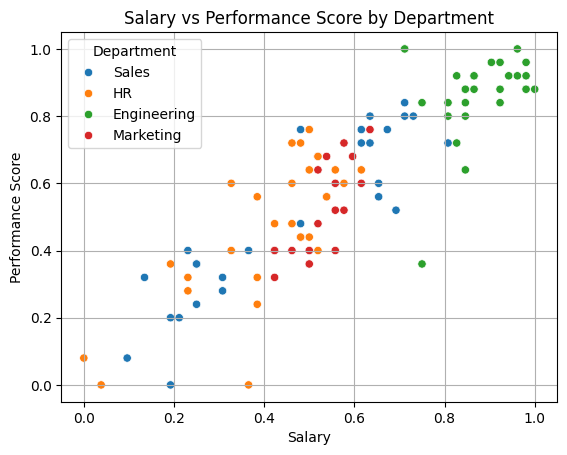

In [118]:
sns.scatterplot(data=df, x='Salary', y='PerformanceScore', hue='Department')
plt.title('Salary vs Performance Score by Department')
plt.xlabel('Salary')
plt.ylabel('Performance Score')
plt.grid(True)
plt.show()
